# House Prices: Advanced Regression Techniques
### Fateme Seyyed Dabbaghi 810197529
#### The aim of this project is to get acquainted with machine learning methods. It has 4 phases. In phase 1 we do some data analysis (‫‪Exploratory‬‬ ‫‪Data‬‬ ‫‪Analysis‬‬). Then in phase 2, we do data processing. Phase 3 is about Model Training, Evaluation, and Hyperparameter Tuning. We use SciKit-Learn library for this approach and our models are based on Linear Regression, Decision Tree, and K-Nearest-Neighbors. And in phase 4 using the models in phase 3, we implement several ‫‪Ensemble‬‬ ‫‪Learning‬‬ methods and analyze the results.
We are given a dataset containing different features of different houses. We also have target data which is price of each house. Our goal is to divide the data into two parts and train the first part and guess the result of the target column in the second part. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from heatmap import corrplot
import seaborn as sns
from statistics import median

In [2]:
train = pd.read_csv ('train.csv')
datas = []
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## ‫‪Phase 0: Visualization‬‬ ‫‪and‬‬ ‫‪EDA‬‬

### 1) overall structure of the data

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2) missing values

In [5]:
missing_values = train.isna().sum()/train.count()['Id']*100
missing_values = missing_values[missing_values != 0]
train.drop('Id', axis = 1, inplace = True)
print(missing_values)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


### Note
As we see the results of the above part for some features like Alley the percentage of missing value is high. But by reading the ‫‪data_description‬‬ file we realize that the NA value means "no Alley access". This problem also happens in other features. we will handle with them later.

Text(0, 0.5, 'Percent of missing values')

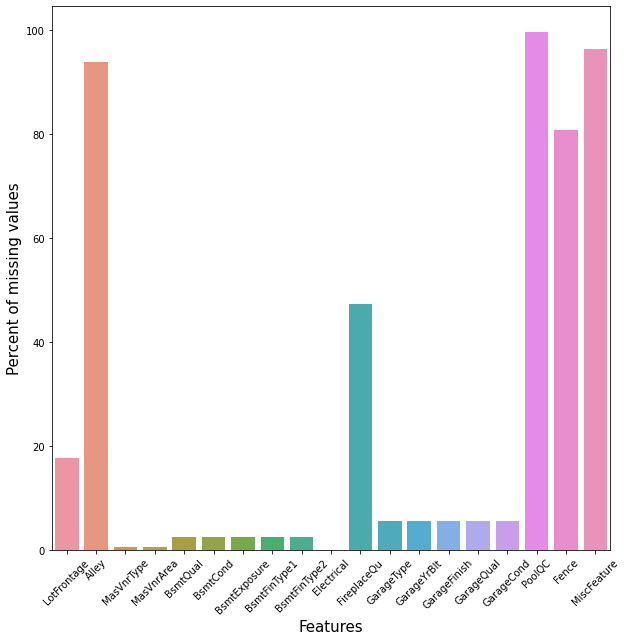

In [6]:
plt.subplots(figsize=(10, 10))
plt.xticks(rotation='45')
sns.barplot(x=missing_values.index, y=missing_values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)

### 3) Data Correlation
We use this map to see how features can correlate with the sales price.

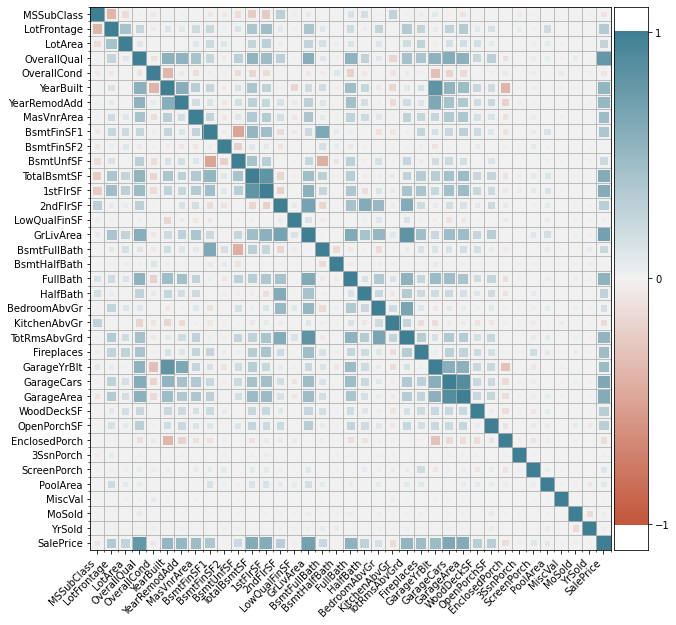

In [7]:
plt.figure(figsize=(10, 10))
corrplot(train.corr(), size_scale=200);

### Note
As we see in the above diagram there are some data that correlate with sales prices more than others.
In the diagram above, the darker the color of a blue house, the more effective it will be. <br/>
We choose 4 features for more analysis. <br/>
The first one is OverallQual which rates the overall material and finish of the house and as shown in the diagram it can correlate with the sales price more than other features. <br/>
The second is GrLivArea; Above grade (ground) living area square feet. <br/>
The third is GarageCars which is the size of a garage in car capacity. GarageArea is also the size of a garage in square feet and we think the effect of these two will be in one direction. <br/>
Fourth is TotalBsmtSF which shows total square feet of the basement area and significantly correlates with the sales price. We won't choose 1stFlrSF although it correlates with sales price, because it correlates with TotalBsmtSF significantly and we guess that its effect on sales price will be measured by just choosing TotalBsmtSF.<br/>

### 4) Log-transformation of the target variable

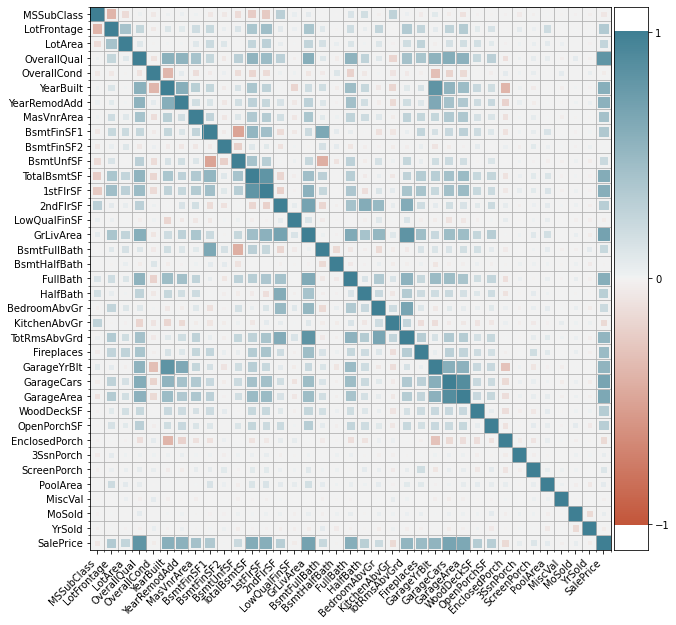

In [8]:
def prep_1(t):
    train_copy = t.copy()
    train_copy['SalePrice'] = np.log(train_copy['SalePrice'])
    return train_copy

train_copy = prep_1(train)
plt.figure(figsize=(10, 10))
corrplot(train_copy.corr(), size_scale=200);

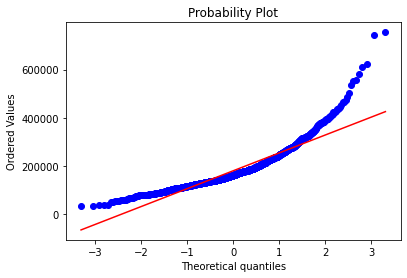

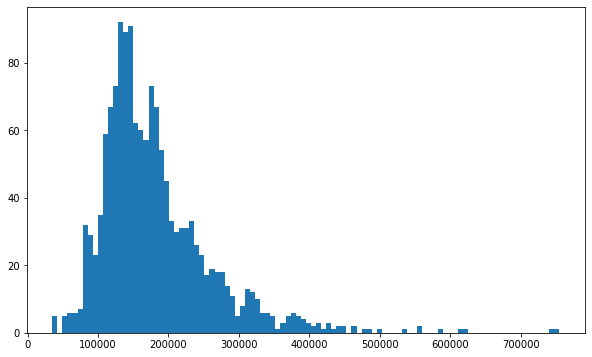

In [9]:
stats.probplot(train['SalePrice'], plot=plt)
plt.show()
train['SalePrice'].hist(bins = 100, grid = False, figsize = (10,6))
plt.show()

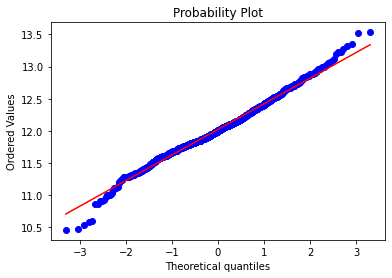

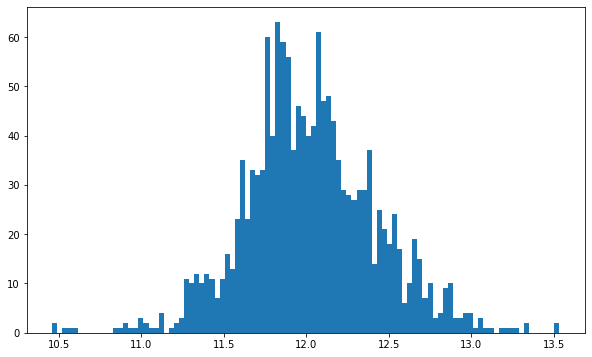

In [10]:
stats.probplot(train_copy['SalePrice'], plot=plt)
plt.show()
train_copy['SalePrice'].hist(bins = 100, grid = False, figsize = (10,6))
plt.show()

In my idea the Log-transformation won't make any obvious change in corrolation diagram but as we can see in the above charts the graph changes from exponential to linear. Converting the graph from exponential to linear mode makes training possible with simpler models.

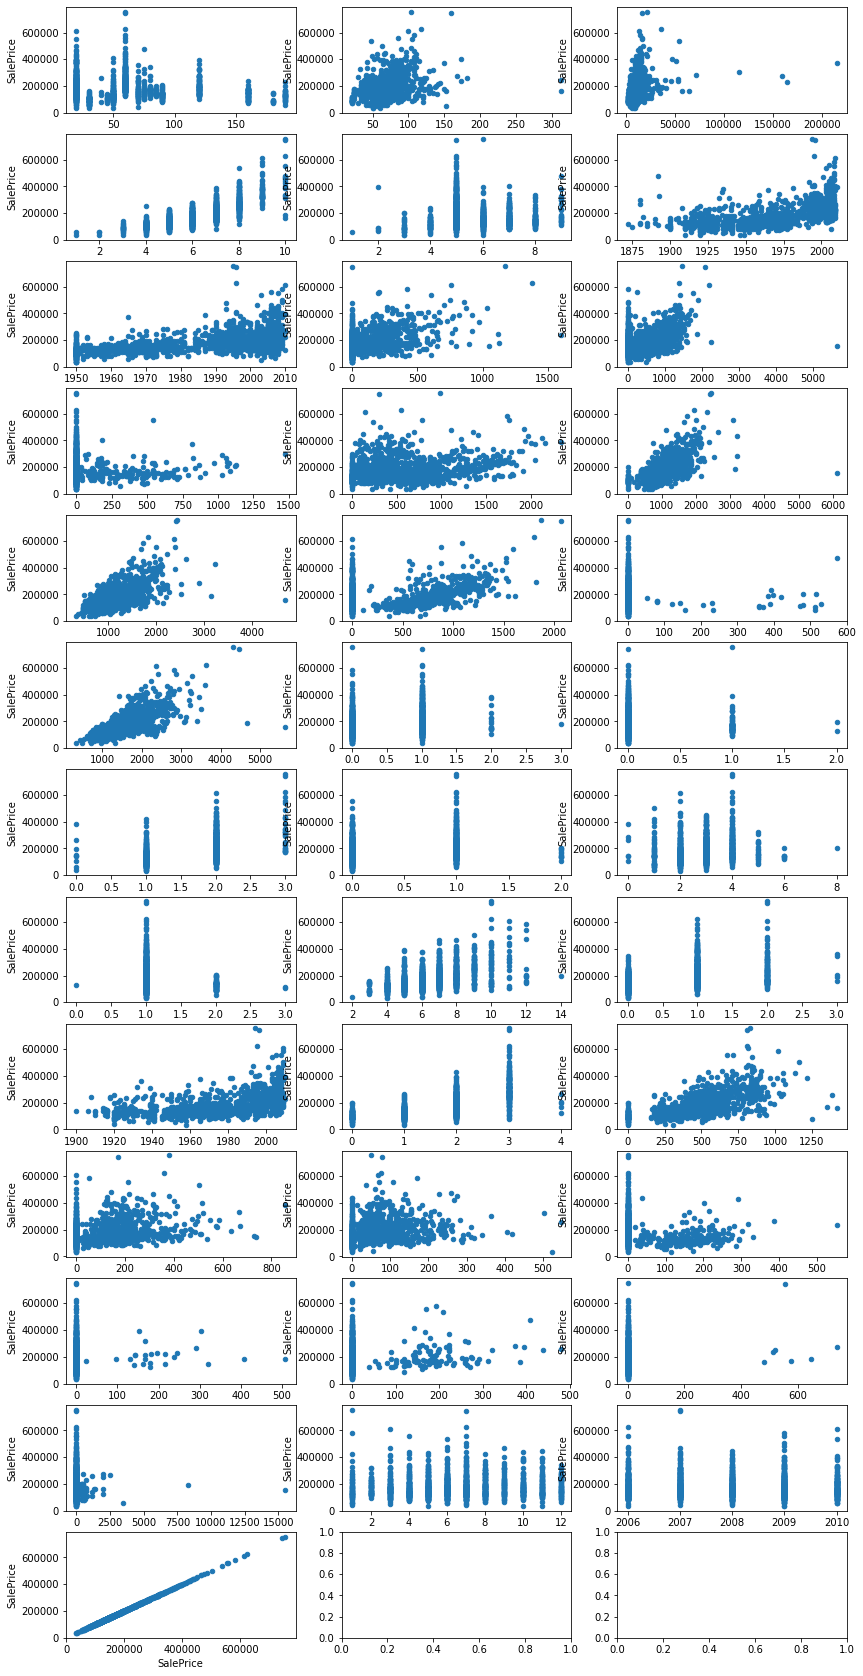

In [11]:
train_numerical_subset = train.select_dtypes(include = [np.number])
fig, axes = plt.subplots(13, 3, figsize=(14, 30))
axe = axes.ravel()
for i, col in enumerate(train_numerical_subset.columns):
    train_numerical_subset.plot(x=(col),y=('SalePrice'),ax=axe[i], kind = 'scatter')
plt.show()

### 5) Is the above corrolation plot enough to examine the data?
No, because it does not contain categorical data. we have to use another way to examine them.

### 6) correlation plots independently

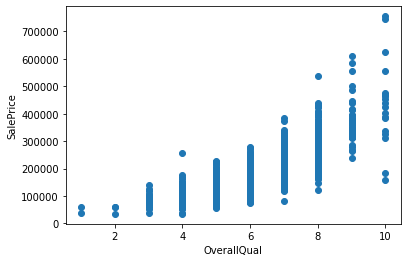

In [12]:
plt.scatter(train['OverallQual'],train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('OverallQual', fontsize=10)
plt.show()

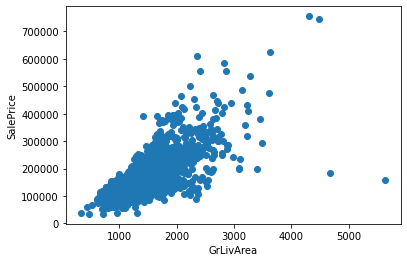

In [13]:
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GrLivArea', fontsize=10)
plt.show()

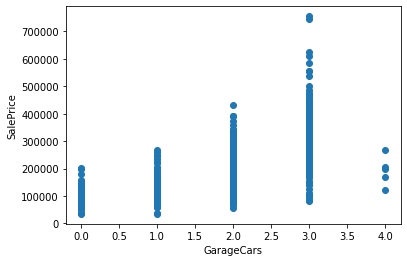

In [14]:
plt.scatter(train['GarageCars'],train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GarageCars', fontsize=10)
plt.show()

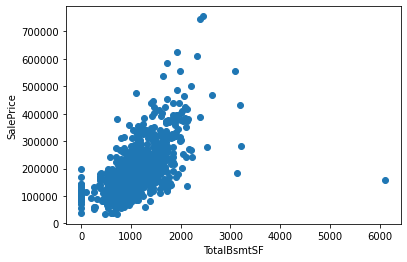

In [15]:
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('TotalBsmtSF', fontsize=10)
plt.show()

### Note
For OverallQual and GarageCars as shown in the plots as OverallQual and GarageCars increase, so does the sales price ceiling increase. There may be a little noise but we can ignore that. The plot shows that other features will have a significant impact on the price. <br/>
For GrLivArea and TotalBsmtSF we can consider several lines with different slopes to model.

### 7) Categorical data
In this part we are asked to choose 3 categorical feature. By reading ‫‪data_description.txt‬‬ we can choose some features measuring their importance and types (not just one type or alot of different types). after choosing those features by looking at their plot we choose three of them which the average price per type of them can divide our data well. 3 features are shown below.

In [16]:
def categorical_plot(category):
    sns.countplot(train[category])
    plt.show()
    categories = train[category].unique()
    price_mean = {}
    for i in categories:
        price_mean[i] = (train[train[category] == i].sum()['SalePrice'])/(train[train[category] == i].count()[category])
    plt.bar(range(len(price_mean)), list(price_mean.values()), align='center')
    plt.xticks(range(len(price_mean)), list(price_mean.keys()))

/home/fateme/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


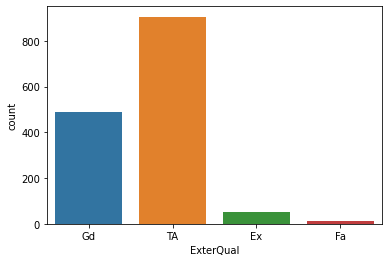

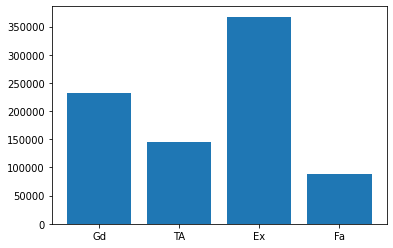

In [17]:
categorical_plot('ExterQual')

/home/fateme/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


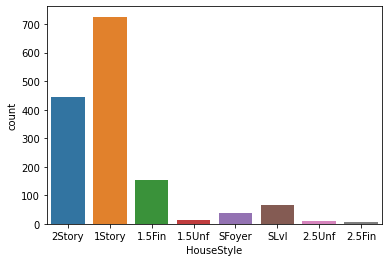

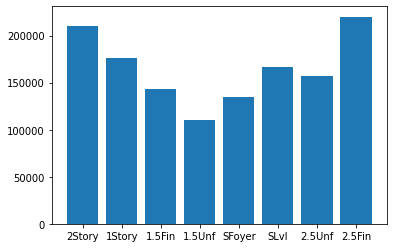

In [18]:
categorical_plot('HouseStyle')

/home/fateme/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


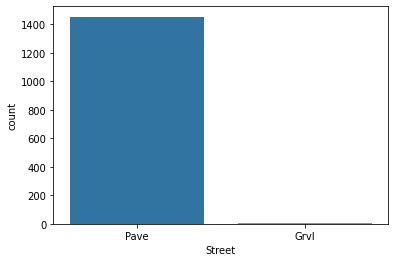

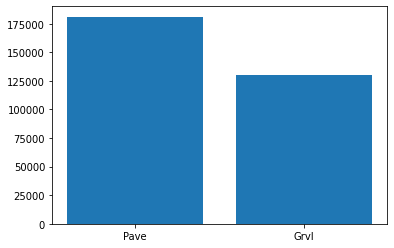

In [19]:
categorical_plot('Street')

### 8) Other anlysis.
We added other analysis in the above parts.

## ‫‪Phase 1: ‫‪Preprocessing‬‬

### 1) NaN Values:
Missing values are handled using different interpolation techniques. One way for handling NaN values is to place median instead of them. The other way is to replace them with mode value. These ways have advantages and disadvanteages. These are the most common method of data imputation, where you just replace all the missing values with the mean, median or mode of the column. While this is useful because it’s easy and fast, it changes the statistical nature of the data. Not only does this skew our histograms, it also underestimates the variance in our data because we’re making numerous values the exact same (when in reality they evidently would not be). <br/>
If we want to examine more closely, the average is noise sensitive and changes the result completely and can only be used for numerical data. Deleting data destroys a lot of important information. The median is also not very accurate. mode is suitable for both data, but we may have two types with close numbers and in this case we will get an wrong answers.


### 2) Filling NaN values.
Features like Alley, PoolQC, Fence,and MiscFeature have the most NaN values but we cannot handle them by removing them because in those cases NaN means that the house doesnt have that feature and nothing is missed or wrong. <br/> <br/>
PoolQC: NA means "No Pool". <br/>
MiscFeature: NA means "no misc feature. "<br/>
Alley: NA means "no alley access. "<br/>
Fence: NA means "no fence. "<br/>
FireplaceQu: NA means "no fireplace". <br/>
LotFrontage: Since Linear feet of street connected to property most likely is like its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood. <br/>
GarageYrBlt, GarageArea and GarageCars: Replacing missing data with 0 (Since No garage = no cars in such garage.). <br/>
BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: Replacing missing data with 0 like above features. <br/>
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : NaN means "no basement". <br/>
MasVnrArea: Replacing missing data with 0. <br/>
MasVnrType: NA means "no masonry veneer for these houses". Replacing missing data with None. <br/>
MSZoning: 'RL' is by far the most common value. So we can fill in missing values with 'RL'. <br/>
Utilities: 'AllPub' is by far the most common value. So we can fill in missing values with 'AllPub'. <br/>
Functional: Replacing missing data with mode. <br/>
Electrical: Replacing missing data with mode ('SBrkr'). <br/>
KitchenQual: Replacing missing data with mode ('TA'). <br/>
Exterior1st and Exterior2nd : Replacing missing data with mode. <br/>
SaleType: Replacing missing data with mode. <br/>
MSSubClass: Na means No building class. We can replace missing values with None. <br/>

In [20]:
#delete nan
def prep2(t):
    train_filled_0 = t.copy()
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea','LotFrontage','MSZoning',
                'Utilities', 'Functional', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
        train_filled_0[col] = train_filled_0[col].dropna()
    train_filled_0 = train_filled_0.fillna('None')
    return train_filled_0

train_filled_0 = prep2(train)

#mean and mode
def prep3(t):
    train_filled_1 = t.copy()
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea','LotFrontage'):
        train_filled_1[col] = train_filled_1[col].fillna(t[col].mean())
    for col in ('MSZoning', 'Utilities', 'Functional', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
        train_filled_1[col] = train_filled_1[col].fillna(t[col].mode())
    train_filled_1 = train_filled_1.fillna('None')
    return train_filled_1

train_filled_1 = prep3(train)

#median and mode
def prep4(t):
    train_filled = t.copy()
    train_filled ['LotFrontage'] = train_filled.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'):
        train_filled[col] = train_filled[col].fillna(0)
    for col in ('MSZoning', 'Utilities', 'Functional', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
        train_filled[col] = train_filled[col].fillna(t[col].mode())
    train_filled = train_filled.fillna('None')
    return train_filled
  
train_filled = prep4(train)

datas.append((train_filled_0,'delete nan'))
datas.append((train_filled_1,'mean and mode nan'))
datas.append((train_filled,'median and mode nan'))
train_filled

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,Normal,142125


### 3) Normalizing and ‫‪Standardizing‬‬
Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais. <br/>
Similarly, the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

In [21]:
#normalize
def prep5(t):
    t1 = t.copy()
    for col in t1:
        if t1[col].dtypes != 'object':
            t1[col] = (t1[col]-t1[col].min())/(t1[col].max()-t1[col].min())
    t1['SalePrice'] = t['SalePrice']      
    return t1

#standardize
def prep6(t):
    t1 = t.copy()
    t1[t1.select_dtypes(exclude=['object']).columns] = StandardScaler().fit_transform(t1[t1.select_dtypes(exclude=['object']).columns])
    t1['SalePrice'] = t['SalePrice']
    return t1

train_filled = prep5(train_filled)
datas.append((train_filled,'normalize'))
t2 = prep6(train_filled)
datas.append((t2,'standardize'))
train_filled

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,RL,0.150685,0.033420,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.00000,0.090909,0.50,WD,Normal,208500
1,0.000000,RL,0.202055,0.038795,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,None,None,None,0.00000,0.363636,0.25,WD,Normal,181500
2,0.235294,RL,0.160959,0.046507,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,None,None,None,0.00000,0.727273,0.50,WD,Normal,223500
3,0.294118,RL,0.133562,0.038561,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,None,None,None,0.00000,0.090909,0.00,WD,Abnorml,140000
4,0.235294,RL,0.215753,0.060576,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,None,None,None,0.00000,1.000000,0.50,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,RL,0.140411,0.030929,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.00000,0.636364,0.25,WD,Normal,175000
1456,0.000000,RL,0.219178,0.055505,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,MnPrv,None,0.00000,0.090909,1.00,WD,Normal,210000
1457,0.294118,RL,0.154110,0.036187,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,GdPrv,Shed,0.16129,0.363636,1.00,WD,Normal,266500
1458,0.000000,RL,0.160959,0.039342,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.00000,0.272727,1.00,WD,Normal,142125


### 5) Deleting columns
For Utilities, all records are "AllPub", except for one "NoSeWa". Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modeling. We can then safely remove it.<br/>
We can also delete one of two columns with the most correlation with each other. like TotalBsmtSF and 1stFlrSF have the most correlation. we can remove one to avoid overfitting.<br/>
For GarageYrBlt, GarageCars, and GarageArea with the same reasoning, we can remove 2 of them.

In [22]:
def prep7(t):
    t1 = t.copy()
    t1 = t1.drop(['Utilities','1stFlrSF','GarageYrBlt','GarageCars'], axis=1)
    return t1
train_filled = prep7(train_filled)
datas.append((train_filled,'delete columns'))

### 4) Categorical features handling
There are different ways for handling categirical data.<br/>
Approach #1 - Find and Replace <br/>
We can directly replace the text values with their numeric equivalent by using replace.<br/>
Approach #2 - Label Encoding<br/>
Another approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number. <br/>
Approach #3 - One Hot Encoding<br/>
A common alternative approach is called one hot encoding. the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.<br/>
There are also other ways but here we choose to apply one Hot-Encode to categorical variables.

In [23]:
def cat_enc(t):
    train_categorical_subset = t.select_dtypes(exclude = [np.number])
    train_categorical_subset = pd.get_dummies(t.select_dtypes(exclude = [np.number]))
    train_numerical_subset = t.select_dtypes(include = [np.number])
    new_train = pd.concat([train_numerical_subset, train_categorical_subset], axis = 1)
    return new_train

In [24]:
data = []
for i in range(len(datas)):
    datas[i] = (cat_enc(datas[i][0]),datas[i][1])

### 6) Validation data
A key property of the validation and test sets is that they must be representative of the new data we will see in the future. <br/>
P mainly depends on 2 things. First, the total number of samples in our data and second, on the actual model we are training. Models with very few hyperparameters will be easy to validate and tune, but if your model has many hyperparameters, we want to have a large validation set as well. We are going to choose the best number for P in our model by testing different ranges. <br/>
Other way for generating validation data is by using cross validation.One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined over the rounds to give an estimate of the model's predictive performance.

In [25]:
def make_validation_data(t):
    train_d, test_d = train_test_split(t, test_size=0.3, random_state=42)
    return train_d, test_d

### Phase 2: Model Training, Evaluation and Hyperparameter Tuning

In [26]:
def seperate_data(train_d, test_d):
    X_train = train_d.drop(['SalePrice'], axis = 1)
    y_train = np.array(train_d['SalePrice']).reshape((-1,1))
    X_test = test_d.drop(['SalePrice'], axis = 1)
    y_test = np.array(test_d['SalePrice']).reshape((-1,1))
    return X_train,y_train, X_test, y_test

In [27]:
def fit_and_evaluate (model,X_train,y_train, X_test, y_test):
    model.fit(X_train, y_train.ravel())
    model_pred = model.predict(X_test)
    model_RMSE = mean_squared_error(y_test, model_pred,squared = False)
    model_MAE = mean_absolute_error(y_test, model_pred)
    
    return model_RMSE,model_MAE 

In [28]:
def k_nearest_neighbor(X_train,y_train, X_test, y_test):
    neigh = KNeighborsRegressor(n_neighbors=5)
    knn_RMSE, knn_MAE = fit_and_evaluate(neigh,X_train,y_train, X_test, y_test)
    print('k_nearest_neighbor')
    print('RMSE: ',knn_RMSE, 'MAE: ',knn_MAE)
    return knn_RMSE,knn_MAE

In [29]:
def decision_tree(X_train,y_train, X_test, y_test):
    des_tree = DecisionTreeRegressor(random_state=0)
    des_RMSE, des_MAE = fit_and_evaluate(des_tree,X_train,y_train, X_test, y_test)
    print('decision tree')
    print('RMSE: ',des_RMSE, 'MAE: ', des_MAE)
    return des_RMSE, des_MAE

In [30]:
def linear_regression(X_train,y_train, X_test, y_test):
    linear_reg = LinearRegression()
    linear_RMSE, linear_MAE = fit_and_evaluate(linear_reg, X_train,y_train, X_test, y_test)
    print('linear regression')
    print('RMSE: ', linear_RMSE, 'MAE: ', linear_MAE)
    return linear_RMSE,linear_MAE

### 1) RMSE & MAE

In [31]:
for i in datas:
    print('preprocess: ', i[1])
    train_d, test_d = make_validation_data(i[0])
    X_train,y_train, X_test, y_test = seperate_data(train_d, test_d)
    k_nearest_neighbor(X_train,y_train, X_test, y_test)
    decision_tree(X_train,y_train, X_test, y_test)
    linear_regression(X_train,y_train, X_test, y_test)
    print()

preprocess:  delete nan
k_nearest_neighbor
RMSE:  46768.1166841189 MAE:  28758.63196347032
decision tree
RMSE:  39618.49139473861 MAE:  25729.116438356163
linear regression
RMSE:  35273193047.38087 MAE:  4726478205.376658

preprocess:  mean and mode nan
k_nearest_neighbor
RMSE:  46735.5506440392 MAE:  28533.59863013699
decision tree
RMSE:  44304.517643062936 MAE:  25797.812785388127
linear regression
RMSE:  78681.1663223364 MAE:  22661.580076768572

preprocess:  median and mode nan
k_nearest_neighbor
RMSE:  47007.79395741358 MAE:  29038.336986301372
decision tree
RMSE:  39701.31981111324 MAE:  25824.036529680365
linear regression
RMSE:  78617.56937547826 MAE:  22641.900914863592

preprocess:  normalize
k_nearest_neighbor
RMSE:  39497.76015610651 MAE:  24462.34931506849
decision tree
RMSE:  39713.595664319306 MAE:  25840.018264840182
linear regression
RMSE:  124118088612052.1 MAE:  13369702188922.512

preprocess:  standardize
k_nearest_neighbor
RMSE:  36447.84551398511 MAE:  21706.65205

### 4) Pre-processing effects
We have done some preprocessing in phase 0 and 1. In this step, we trained different models and we want to examine the effect of preprocessors on data. in filling nan phase, for example, we have applied three different ways and as we can see in the outcome median and mode nan way for filling nan values has the best outcome among others.<br/>
for standardization and normalization standardizing the outcome has had a better outcome in the two first models but in linear regression, both standardization and normalization have bad effects. so we choose not to apply them. <br/>
and as another example deleting columns has had a good effect comparing to not deleting them. so we choose to delete them.<br/>
now we are going to choose the preprocesses with the best effect among others and apply them to our data.

In [32]:
train = prep4(train)
train = prep7(train)
train = cat_enc(train)
train_d, test_d = make_validation_data(train)
X_train,y_train, X_test, y_test = seperate_data(train_d, test_d)
r1,r11 = k_nearest_neighbor(X_train,y_train, X_test, y_test)
r2,r21 = decision_tree(X_train,y_train, X_test, y_test)
r3,r31 = linear_regression(X_train,y_train, X_test, y_test)

k_nearest_neighbor
RMSE:  47112.928403487575 MAE:  28507.628310502285
decision tree
RMSE:  38813.1903861568 MAE:  24751.819634703195
linear regression
RMSE:  77320.46132745552 MAE:  22557.021174913265


### model comparison

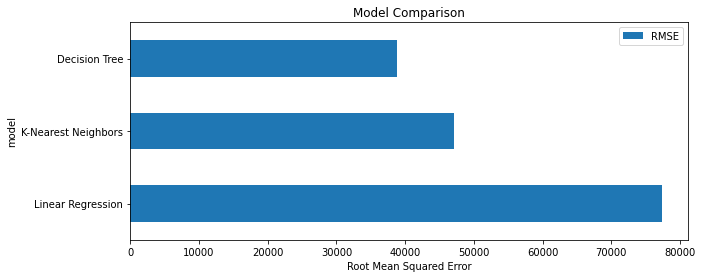

In [33]:
model_comparison = pd.DataFrame({'model': ['K-Nearest Neighbors', 'Decision Tree','Linear Regression'],'RMSE': [r1,r2,r3]})

model_comparison.sort_values('RMSE', ascending = False).plot(x = 'model',y = 'RMSE', kind = 'barh', figsize = (10,4))
plt.xlabel('Root Mean Squared Error')
plt.title('Model Comparison')
plt.show()

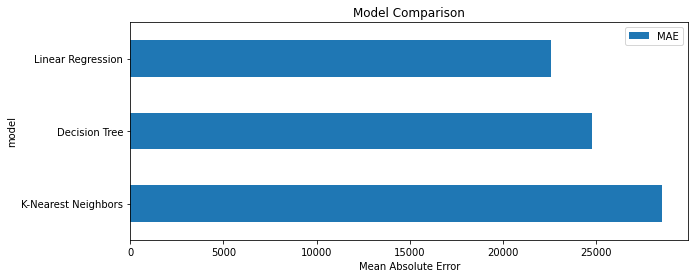

In [34]:
model_comparison_1 = pd.DataFrame({'model': ['K-Nearest Neighbors', 'Decision Tree','Linear Regression'],'MAE': [r11,r21,r31]})

model_comparison_1.sort_values('MAE', ascending = False).plot(x = 'model',y = 'MAE', kind = 'barh', figsize = (10,4))
plt.xlabel('Mean Absolute Error')
plt.title('Model Comparison')
plt.show()

### 2) Hyperparameter

#### KNeighborsRegressor

In [35]:
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, {'n_neighbors': [1, 100]})
knn_RMSE, knn_MAE = fit_and_evaluate(knn_grid,X_train,y_train, X_test, y_test)
print('k_nearest_neighbor')
print('RMSE: ',knn_RMSE, 'MAE: ',knn_MAE)

k_nearest_neighbor
RMSE:  52105.96957450352 MAE:  34294.48630136986


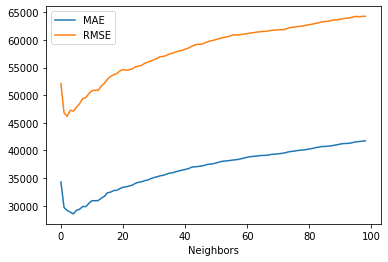

In [36]:
rmse = []
mae = []
for i in range(1,100):
    neigh = KNeighborsRegressor(n_neighbors=i)
    knn_RMSE, knn_MAE = fit_and_evaluate(neigh,X_train,y_train, X_test, y_test)
    rmse.append(knn_RMSE)
    mae.append(knn_MAE)

plt.plot(mae, label='MAE')
plt.plot(rmse, label='RMSE')
plt.xlabel('Neighbors')
plt.legend()

#### DecisionTreeRegressor

In [37]:
des_tree = DecisionTreeRegressor()
des_tree_grid = GridSearchCV(des_tree, {'max_depth': [2, 50]})
des_RMSE, des_MAE = fit_and_evaluate(des_tree_grid,X_train,y_train, X_test, y_test)
print('decision tree')
print('RMSE: ',des_RMSE, 'MAE: ', des_MAE)

decision tree
RMSE:  38862.82883427663 MAE:  25154.13470319635


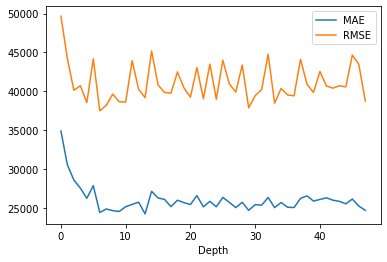

In [38]:
rmse = []
mae = []
for i in range(2,50):
    dec = DecisionTreeRegressor(max_depth=i)
    dec_RMSE, dec_MAE = fit_and_evaluate(dec,X_train,y_train, X_test, y_test)
    rmse.append(dec_RMSE)
    mae.append(dec_MAE)

plt.plot(mae, label='MAE')
plt.plot(rmse, label='RMSE')
plt.xlabel('Depth')
plt.legend()

### 2) Underfitting & Overfitting
Overfitting refers to a model that models the training data too well.<br/>
Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.<br/>
Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.<br/>
As we see below plots overfitting is clearly visible in the decision tree. decision trees are a nonparametric machine learning algorithm that is very flexible and is subject to overfitting training data.<br/>

Underfitting refers to a model that can neither model the training data nor generalize to new data. An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.<br/>
There is also underfitting in our model. as we see the k_nearest_neighbor results we can understand that both rmse and mae errors are high and not good enough for training data.

k_nearest_neighbor
RMSE:  39837.70081620632 MAE:  25267.94363992172
k_nearest_neighbor
RMSE:  47112.928403487575 MAE:  28507.628310502285


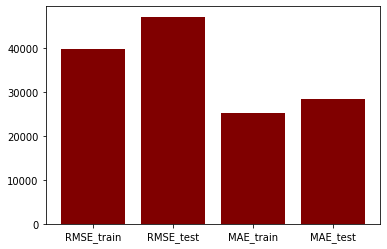

In [39]:
r1,m1 = k_nearest_neighbor(X_train,y_train, X_train,y_train)
r2,m2 = k_nearest_neighbor(X_train,y_train, X_test, y_test)

data = {'RMSE_train':r1, 'RMSE_test':r2, 'MAE_train':m1, 'MAE_test':m2} 
courses = list(data.keys()) 
values = list(data.values()) 

plt.bar(courses, values, color ='maroon') 
plt.show() 

decision tree
RMSE:  0.0 MAE:  0.0
decision tree
RMSE:  38813.1903861568 MAE:  24751.819634703195


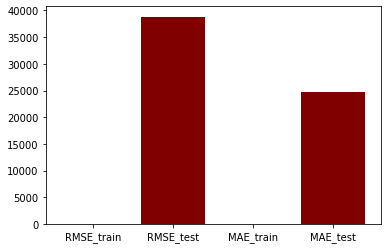

In [40]:
r1,m1 = decision_tree(X_train,y_train, X_train,y_train)
r2,m2 = decision_tree(X_train,y_train, X_test, y_test)

data = {'RMSE_train':r1, 'RMSE_test':r2, 'MAE_train':m1, 'MAE_test':m2} 
courses = list(data.keys()) 
values = list(data.values()) 

plt.bar(courses, values, color ='maroon') 
plt.show() 

linear regression
RMSE:  18925.666062832308 MAE:  12147.79224846683
linear regression
RMSE:  77320.46132745552 MAE:  22557.021174913265


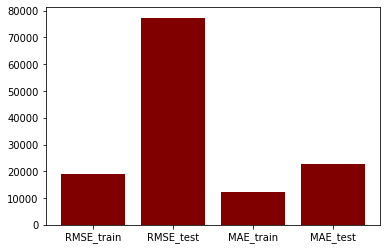

In [41]:
r1,m1 = linear_regression(X_train,y_train, X_train,y_train)
r2,m2 = linear_regression(X_train,y_train, X_test, y_test)

data = {'RMSE_train':r1, 'RMSE_test':r2, 'MAE_train':m1, 'MAE_test':m2} 
courses = list(data.keys()) 
values = list(data.values()) 

plt.bar(courses, values, color ='maroon') 
plt.show() 

### Phase 3: Ensemble Methods

### 1) Random Forest

In [42]:
random_forest = RandomForestRegressor()
random_forest_RMSE,random_forest_MAE = fit_and_evaluate(random_forest,X_train,y_train, X_test, y_test)
print('random forest')
print('RMSE: ',random_forest_RMSE,'MAE: ', random_forest_MAE)

random forest
RMSE:  28958.50974232929 MAE:  17676.782328767124


#### Hyperparameter

In [43]:
random_forest = RandomForestRegressor()
random_forest_grid = GridSearchCV(random_forest, {'max_depth': [5, 40],'n_estimators': [10, 400]})
random_forest_RMSE,random_forest_MAE = fit_and_evaluate(random_forest_grid,X_train,y_train, X_test, y_test)
print('random forest')
print('RMSE: ',random_forest_RMSE,'MAE: ', random_forest_MAE)

random forest
RMSE:  27401.00762147218 MAE:  17101.325439497716


### 2) Voting Regressor

In [44]:
voting_reg = VotingRegressor([('knn', KNeighborsRegressor(n_neighbors=5)), ('ds', DecisionTreeRegressor(random_state=0)),('lr',LinearRegression())])
vot_RMSE, vot_MAE = fit_and_evaluate(voting_reg,X_train,y_train, X_test, y_test)
print('voting regressor')
print('RMSE: ',vot_RMSE,'MAE: ', vot_MAE)

voting regressor
RMSE:  38577.5911041571 MAE:  19182.30195223733


### 3) Voting Regressor, Cause of failure or superiority

A voting ensemble is an ensemble machine learning model that combines the predictions from multiple other models. It is a technique that may be used to improve model performance, ideally achieving better performance than any single model used in the ensemble. In this method, different methods cover each other's weaknesses and this improves the overall result.